## Importing Libraries and Setting Up Environment

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
np.random.seed(42)

In [54]:
pca_df = pd.read_csv('../data/heart_disease_preprocessed_pca.csv')

## Data Splitting

In [55]:
X = pca_df.drop('num', axis=1)
y = pca_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

with open('../.pkl//X_train.pkl', 'wb') as file:
  pickle.dump(X_train, file)

with open('../.pkl/y_train.pkl', 'wb') as file:
  pickle.dump(y_train, file)

# Supervised Learning - Classification

## Logistic Reg

In [56]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_log))
print('f1_score',f1_score(y_test, y_pred_log))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_log))
print('precision_score',precision_score(y_test, y_pred_log))
print('recall_score',recall_score(y_test, y_pred_log))

print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
cm

accuracy_score 0.8582677165354331
f1_score 0.8875
balanced_accuracy_score 0.8428833071690214
precision_score 0.8658536585365854
recall_score 0.9102564102564102
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.87      0.91      0.89        78

    accuracy                           0.86       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.86      0.86      0.86       127



array([[38, 11],
       [ 7, 71]])

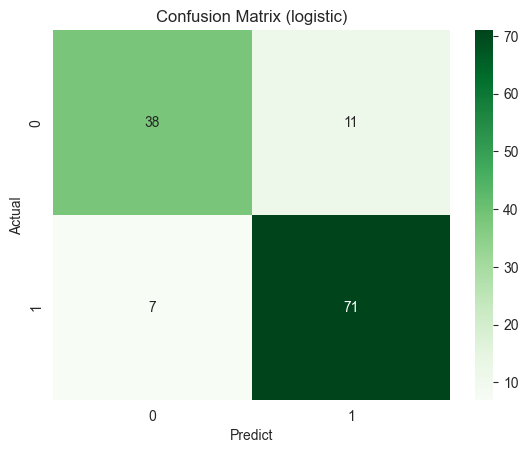

In [57]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (logistic)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

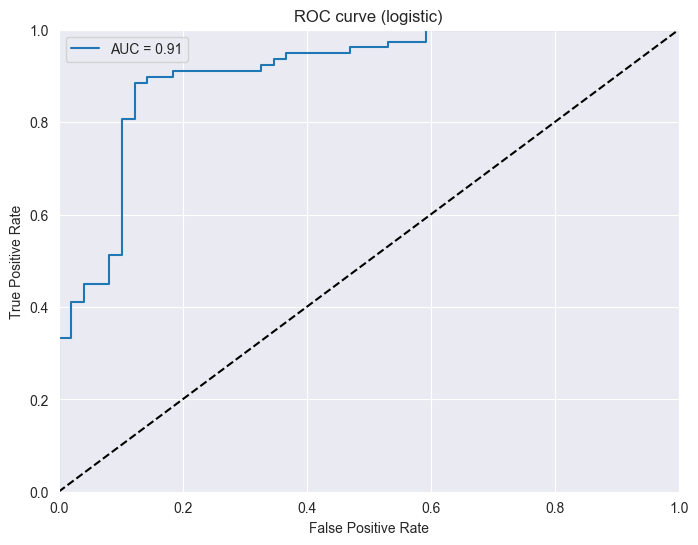

In [58]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_log[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (logistic)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

In [59]:
DT_model = DecisionTreeClassifier(criterion='gini', random_state=42)
DT_model.fit(X_train, y_train)

y_pred_DT = DT_model.predict(X_test)
y_pred_prob_DT = DT_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_DT))
print('f1_score',f1_score(y_test, y_pred_DT))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_DT))
print('precision_score',precision_score(y_test, y_pred_DT))
print('recall_score',recall_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))
cm = confusion_matrix(y_test, y_pred_DT)
cm

accuracy_score 0.7559055118110236
f1_score 0.8
balanced_accuracy_score 0.7443746729461015
precision_score 0.8051948051948052
recall_score 0.7948717948717948
              precision    recall  f1-score   support

           0       0.68      0.69      0.69        49
           1       0.81      0.79      0.80        78

    accuracy                           0.76       127
   macro avg       0.74      0.74      0.74       127
weighted avg       0.76      0.76      0.76       127



array([[34, 15],
       [16, 62]])

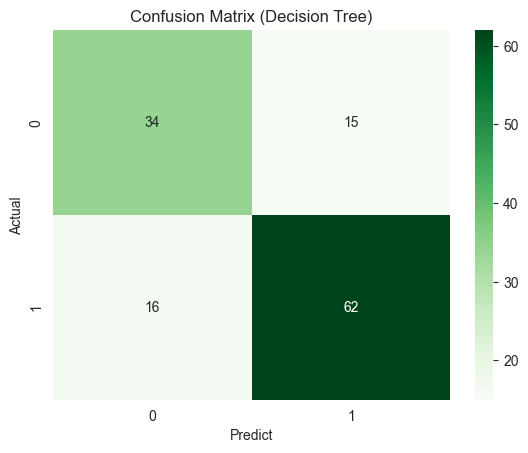

In [60]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

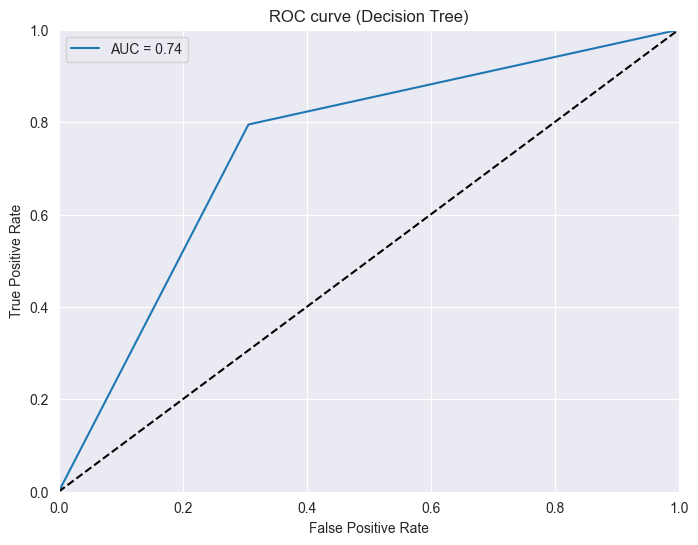

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_DT[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [62]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

y_pred_RF = RF_model.predict(X_test)
y_pred_prob_RF = RF_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_RF))
print('f1_score',f1_score(y_test, y_pred_RF))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_RF))
print('precision_score',precision_score(y_test, y_pred_RF))
print('recall_score',recall_score(y_test, y_pred_RF))

print(classification_report(y_test, y_pred_RF))
cm = confusion_matrix(y_test, y_pred_RF)
cm

accuracy_score 0.8346456692913385
f1_score 0.874251497005988
balanced_accuracy_score 0.8046834118262689
precision_score 0.8202247191011236
recall_score 0.9358974358974359
              precision    recall  f1-score   support

           0       0.87      0.67      0.76        49
           1       0.82      0.94      0.87        78

    accuracy                           0.83       127
   macro avg       0.84      0.80      0.82       127
weighted avg       0.84      0.83      0.83       127



array([[33, 16],
       [ 5, 73]])

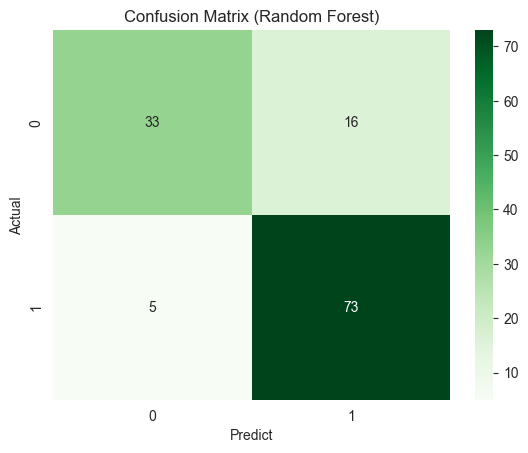

In [63]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

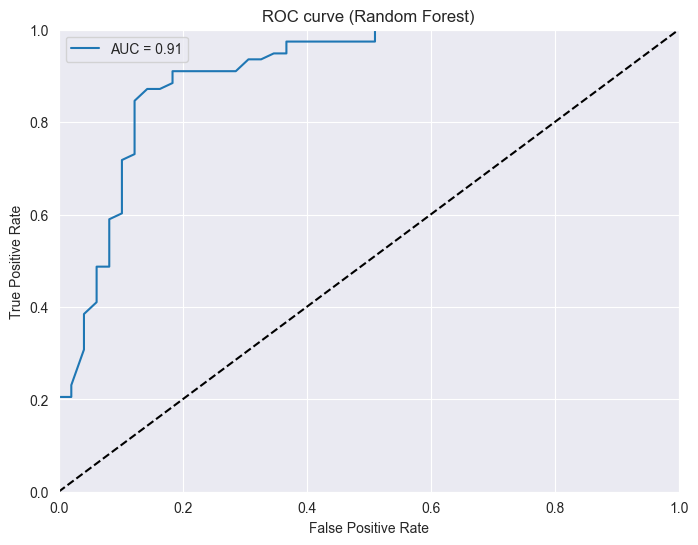

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_RF[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Machine (SVM)

In [65]:
SVM_model = SVC(kernel='linear', degree=5, random_state=42)
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.predict(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_SVM))
print('f1_score',f1_score(y_test, y_pred_SVM))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_SVM))
print('precision_score',precision_score(y_test, y_pred_SVM))
print('recall_score',recall_score(y_test, y_pred_SVM))

print(classification_report(y_test, y_pred_SVM))
cm = confusion_matrix(y_test, y_pred_SVM)
cm

accuracy_score 0.8582677165354331
f1_score 0.8875
balanced_accuracy_score 0.8428833071690214
precision_score 0.8658536585365854
recall_score 0.9102564102564102
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.87      0.91      0.89        78

    accuracy                           0.86       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.86      0.86      0.86       127



array([[38, 11],
       [ 7, 71]])

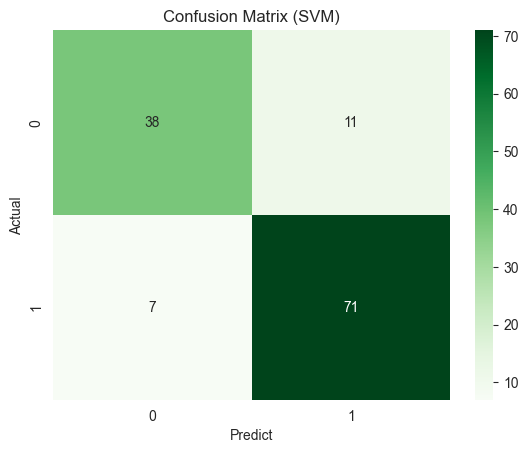

In [66]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [67]:
xgb_model = XGBClassifier(subsample=0.2, n_estimators=250, max_depth=3, learning_rate=0.01, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_xgb))
print('f1_score',f1_score(y_test, y_pred_xgb))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_xgb))
print('precision_score',precision_score(y_test, y_pred_xgb))
print('recall_score',recall_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
cm

accuracy_score 0.8661417322834646
f1_score 0.896969696969697
balanced_accuracy_score 0.8417059131344846
precision_score 0.8505747126436781
recall_score 0.9487179487179487
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        49
           1       0.85      0.95      0.90        78

    accuracy                           0.87       127
   macro avg       0.88      0.84      0.85       127
weighted avg       0.87      0.87      0.86       127



array([[36, 13],
       [ 4, 74]])

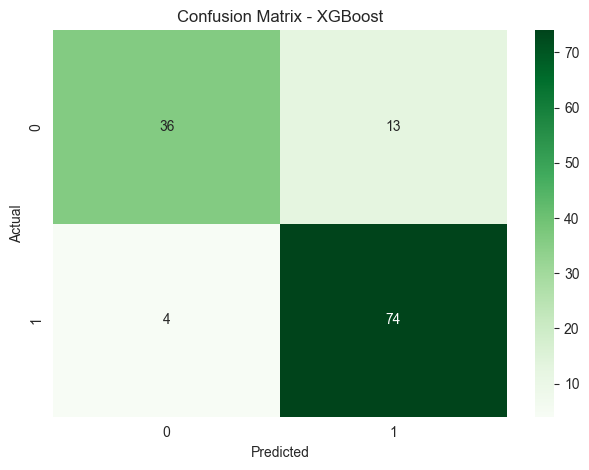

In [68]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')

plt.tight_layout()
plt.show()

## Voting Classifier

In [69]:
voting_model = VotingClassifier(estimators=[
    ('log_model', log_model),
    ('RF_model', RF_model),
    ('xgb_model', xgb_model)
], voting='hard')

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_voting))
print('f1_score',f1_score(y_test, y_pred_voting))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_voting))
print('precision_score',precision_score(y_test, y_pred_voting))
print('recall_score',recall_score(y_test, y_pred_voting))

print(classification_report(y_test, y_pred_voting))
cm = confusion_matrix(y_test, y_pred_voting)
cm

accuracy_score 0.8503937007874016
f1_score 0.8834355828220859
balanced_accuracy_score 0.8288854003139718
precision_score 0.8470588235294118
recall_score 0.9230769230769231
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.85      0.92      0.88        78

    accuracy                           0.85       127
   macro avg       0.85      0.83      0.84       127
weighted avg       0.85      0.85      0.85       127



array([[36, 13],
       [ 6, 72]])

## Evaluation Models

Final Model Evaluation:
                              Accuracy  F1-Score
Model                                           
XGBoost                          86.61     89.70
Logistic Regression              85.83     88.75
Support Vector Machine (SVM)     85.83     88.75
Voting Classifier                85.04     88.34
Random Forest                    83.46     87.43
Decision Tree                    75.59     80.00


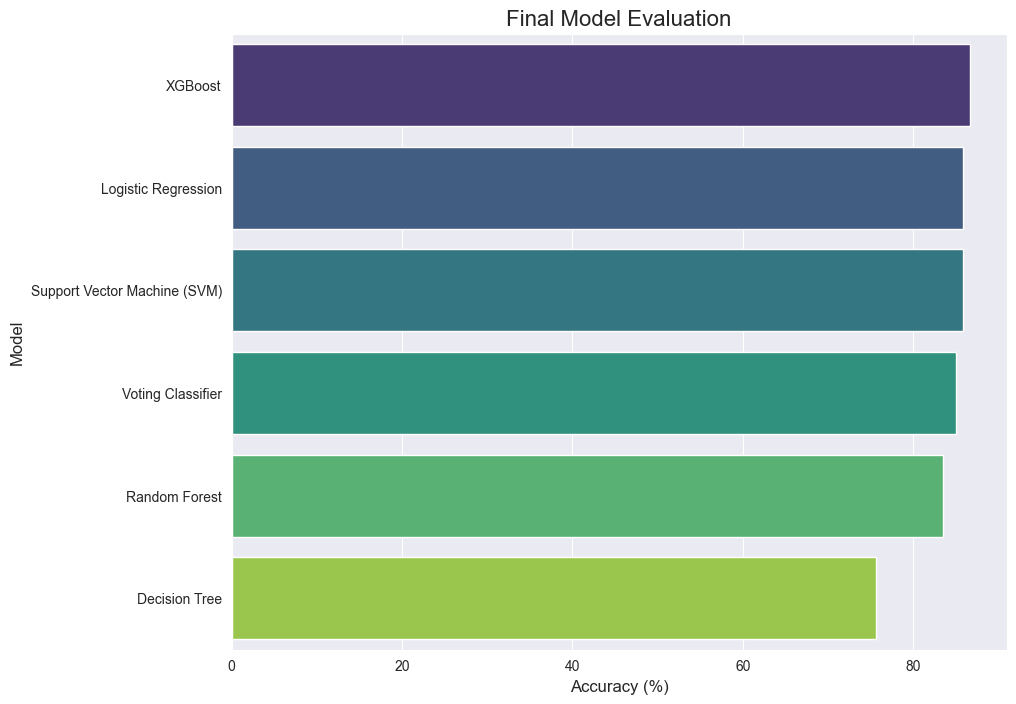

In [70]:
all_models = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'Support Vector Machine (SVM)', 'XGBoost', 'Voting Classifier'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_DT),
        accuracy_score(y_test, y_pred_RF), accuracy_score(y_test, y_pred_SVM),
        accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_voting)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_DT),
        f1_score(y_test, y_pred_RF), f1_score(y_test, y_pred_SVM),
        f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_voting)
    ]
}

performance_df = pd.DataFrame(all_models).set_index('Model').sort_values(by='Accuracy', ascending=False)

print('Final Model Evaluation:')
print((performance_df * 100).round(2))

plt.figure(figsize=(10, 8))
sns.barplot(x=performance_df['Accuracy'] * 100, y=performance_df.index, palette='viridis')
plt.title('Final Model Evaluation', fontsize=16)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.show()

# Export Final Model

In [71]:
models = {
  'log' : log_model,
  'DT_model' : DT_model,
  'RF_model' : RF_model,
  'SVM_model' : SVM_model,
  'final_model_XGBoost_model' : xgb_model,
  'Voting_model' : voting_model
}

for name, model in models.items():
  with open(f'../models/{name}.pkl', 'wb') as file:
    pickle.dump(model, file)